## Data exploration for Sentence Bert Pretraining Data 

In [2]:
import numpy as np
import pandas as pd

import time
import datetime as datetime
import os 

from sentence_transformers import SentenceTransformer, util
import torch

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from tqdm import tqdm

import matplotlib.pyplot as plt

In [4]:
import matplotlib
import sentence_transformers

print('Torch version: ', torch.__version__)
#print('UMAP version: ', umap.__version__)
print('matplotlib: {}'.format(matplotlib.__version__))
print('sentence_transformers: {}'.format(sentence_transformers.__version__))

Torch version:  1.12.0+cu102
matplotlib: 3.5.1
sentence_transformers: 2.2.2


In [5]:
#from sentence_transformers import datasets

In [6]:
from datasets import Dataset,load_dataset,concatenate_datasets,load_from_disk

In [10]:
data_path = os.path.join('/media/chengyu/Elements1/HuggingFace/Data/sentence_bert/pre_training_raw_data','IMF_Documents_2018.txt')
raw_dataset = load_dataset('text', data_files=data_path) ## default split is 'train'
raw_dataset

Using custom data configuration default-85d2ff23a98aaf78
Reusing dataset text (/home/chengyu/.cache/huggingface/datasets/text/default-85d2ff23a98aaf78/0.0.0/acc32f2f2ef863c93c2f30c52f7df6cc9053a1c2230b8d7da0d210404683ca08)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 2477094
    })
})

#### Take a look at overal paragraph legnth (sample some)

In [42]:
sample_data = raw_dataset.shuffle(seed=42)['train'].select(range(10000))

Loading cached shuffled indices for dataset at /home/chengyu/.cache/huggingface/datasets/text/default-85d2ff23a98aaf78/0.0.0/acc32f2f2ef863c93c2f30c52f7df6cc9053a1c2230b8d7da0d210404683ca08/cache-6a75708ef9b28d1c.arrow


In [43]:
def get_length(e):
    e['length'] = len(e['text'].split())
    return e

  0%|          | 0/10000 [00:00<?, ?ex/s]

<AxesSubplot:>

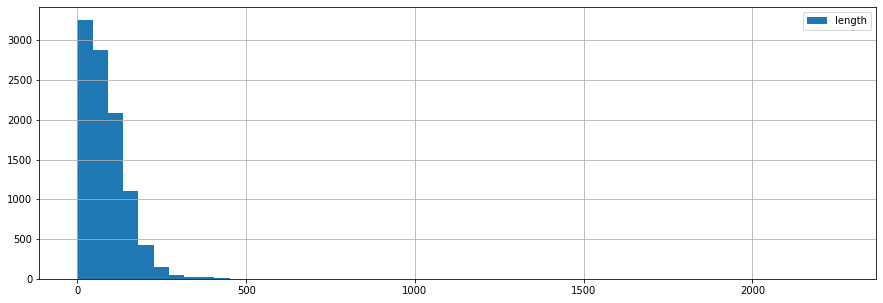

In [44]:
sample_data = sample_data.map(get_length,batch_size=1000)
df = sample_data.to_pandas()['length']
df.hist(bins=50, figsize=(15,5), legend=True)